### AB TEST Case Study E-Commerce

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

The Marketing and Product teams are studying a new bundle-offer that they want to test in the checkout funnel of the e-commerce platform. In particular, once the user adds something to the cart, they will see an additional screen showing a special offer on a related product if they add it to the cart and purchase them together. 

To be sure that this is a good idea, they conducted an AB test and, after the fact, they call you in to analyse the results, to verify whether the increased conversion rate is statistically significant. 


***

Import and clean the data

In [2]:
df = pd.read_csv('C:/Users/USER/python/HOMEWORK/data/ab-test-homework.csv')

In [3]:
df.head()

,idUser,dtPurchased,nmGroup,isConv
0,70893691,2017-08-02,GRP A,0
1,42506632,2017-08-21,GRP A,0
2,42520540,2017-09-30,GRP A,0
3,62816375,2017-05-31,GRP A,0
4,62801089,2017-06-28,GRP A,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       6177 non-null   int64 
 1   dtPurchased  6177 non-null   object
 2   nmGroup      6177 non-null   object
 3   isConv       6177 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 193.2+ KB


In [5]:
df['dtPurchased'] = pd.to_datetime(df['dtPurchased'])

Data analysis and exploration

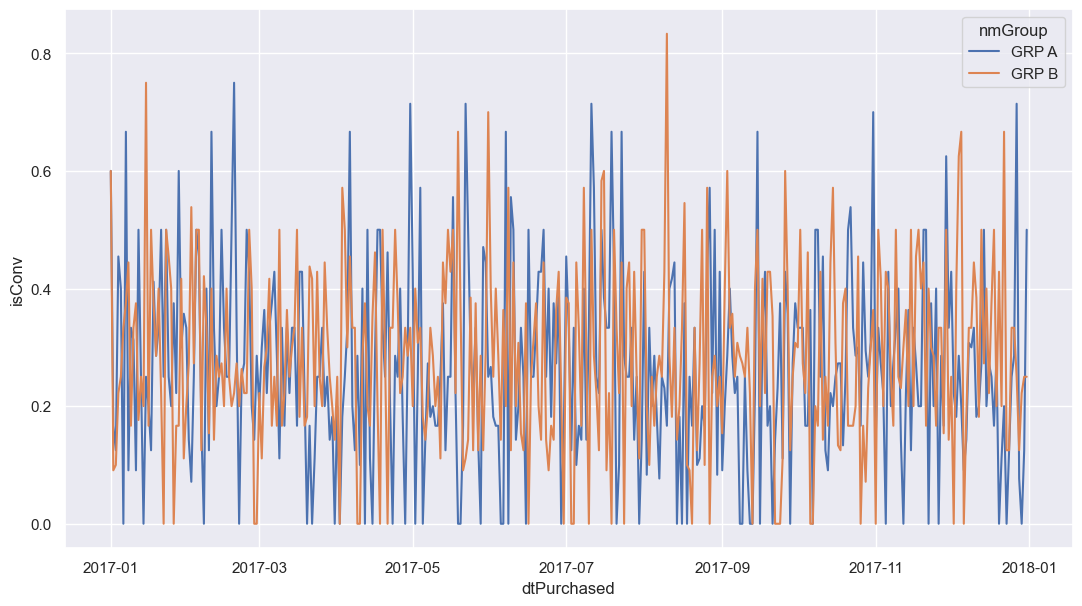

In [6]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(x='dtPurchased', y='isConv', data=df.groupby(['dtPurchased', 'nmGroup'], as_index=False)['isConv'].mean(), hue='nmGroup')
plt.show()

In [7]:
df.groupby('nmGroup', as_index=False)['isConv'].size()

,nmGroup,size
0,GRP A,3029
1,GRP B,3148


In [8]:
df.groupby('nmGroup', as_index=False)['isConv'].mean()

,nmGroup,isConv
0,GRP A,0.267745
1,GRP B,0.290661


Permutation test

In [9]:
mu_control = np.mean(df[df.nmGroup=='GRP A']['isConv'])
mu_treatment = np.mean(df[df.nmGroup=='GRP B']['isConv'])
mu_diff = mu_treatment - mu_control
print('Observed test statistic:', mu_diff)

Observed test statistic: 0.022915606569783087


In [10]:
n = 500
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['isConv']) - np.mean(df_sample2['isConv'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

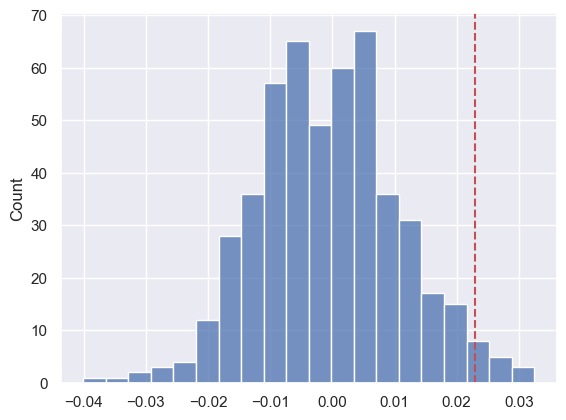

Avgerage Simulated Test Statistic: -0.0005
Initially Observed Test Statistic: 0.0229


In [11]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('Avgerage Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')

In [12]:
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 14
Total results: 500
p-value: 14 / 500 = 0.028


We reject the null hypothesis with a 5% significance level. 